In [34]:
import sys
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Select_cluster')

sys.path.append('../')

from Generator import *
from solver import *

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sb
from sklearn import svm
from sklearn.preprocessing import normalize
import numpy as np

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


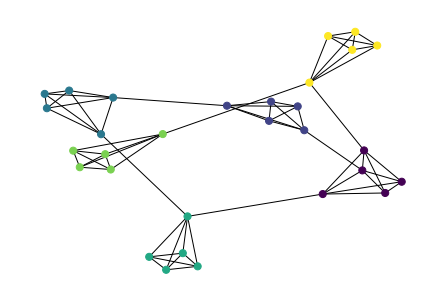

In [2]:
list_shapes = ['nx.complete_graph'] * 6
list_shapes_args = [[5]] * 6
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=50, std=0.5, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

In [89]:
clf = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.1)
X = normalize(node_features)
pred_label = clf.fit_predict(X)
group_label = np.array(group_label)
print(group_label[pred_label==-1])

[0 1 3 3 5 5 5 5]


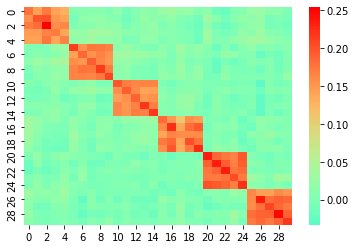

In [101]:
# the optimal W when there is no constraint
L = np.float32(nx.laplacian_matrix(G).todense())
Gamma = np.float32(nx.incidence_matrix(G).todense().T) # E * N
for i in range(Gamma.shape[0]):
    for j in range(Gamma.shape[1]):
        if Gamma[i,j] !=0:
            Gamma[i,j] = - Gamma[i,j]
            break

W = lap_sylvester_solver(X=node_features, L=L, l2=100)
sb.heatmap(W, cmap='rainbow', center=0)
W_norm = normalize(W.T)

In [106]:
clf = svm.OneClassSVM(nu=0.3, kernel="linear", gamma=0.1)
pred_label = clf.fit_predict(W_norm)
group_label = np.array(group_label)
print(group_label[pred_label==-1])

[0 1 2 2 2 3 3 4 5]
